<a href="https://colab.research.google.com/github/ShyamSundhar1411/ANN/blob/master/LangGraph/Graph_Building_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from typing import Dict, TypedDict
from langgraph.graph import StateGraph

## Hello World Agent

In [2]:
class AgentState(TypedDict): # State Schema
  message: str

def greeting_node(state: AgentState) -> AgentState:
  """
    Simple node that adds a greeting message to the state
  """
  state["message"] = "Hey"+state["message"]+", how is your day going"
  return state


In [3]:
graph = StateGraph(AgentState)
graph.add_node(
    "greeter",
    greeting_node
)
graph.set_entry_point("greeter")
graph.set_finish_point("greeter")
app = graph.compile()

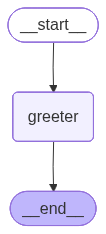

In [4]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [5]:
result = app.invoke({"message":"Bob"})

In [6]:
result

{'message': 'HeyBob, how is your day going'}

In [7]:
result["message"]

'HeyBob, how is your day going'

## Compliment Agent


In [8]:
class AgentState(TypedDict):
  name: str
def compliment_node(state:AgentState)->AgentState:
  """
    Node that compliments a user
  """
  state["name"] = state["name"]+", you're doing an amazing job learning LangGraph!"
  return state

In [9]:
graph = StateGraph(AgentState)
graph.add_node(
    "complimenter",
    compliment_node
)
graph.set_entry_point(
    "complimenter"
)
graph.set_finish_point(
    "complimenter"
)
app = graph.compile()

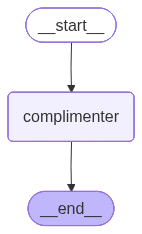

In [10]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [11]:
result = app.invoke({"name":"Bob"})

In [12]:
result

{'name': "Bob, you're doing an amazing job learning LangGraph!"}

## Multi Input Graphs

### Adder

In [13]:
from typing import List, TypedDict

In [14]:
class AgentState(TypedDict):
  values: List[int]
  name: str
  result: str

In [15]:
def process_values(state:AgentState)->AgentState:
  """
  A simple node that processes the list of integers and other inputs
  """
  state["result"] = f"Hi there {state["name"]}! The sum of the values is {sum(state["values"])}"
  return state

In [16]:
graph = StateGraph(AgentState)
graph.add_node(
    "processor",
    process_values
)
graph.set_entry_point("processor")
graph.set_finish_point("processor")
app = graph.compile()

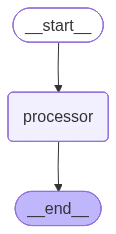

In [17]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [18]:
result = app.invoke({"values":[10,20,30,40],"name":"Shyam"})

In [19]:
result

{'values': [10, 20, 30, 40],
 'name': 'Shyam',
 'result': 'Hi there Shyam! The sum of the values is 100'}

### Operation Handler

In [20]:
from typing import List,TypedDict
import math
class AgentState(TypedDict):
  name: str
  values: List[int]
  operation: str
  result: str

def operation_handler(state:AgentState)->AgentState:
  """
  A simple node that applies operations to the list
  """
  operation = state["operation"]
  if operation == "*":
    answer = math.prod(state["values"])
  else:
    answer = sum(state["values"])
  result = f"Hi {state["name"]}, Your answer is {answer}"
  state["result"] = result
  return state

In [21]:
graph = StateGraph(AgentState)
graph.add_node(
    "operation_handler",
    operation_handler
)
graph.set_entry_point("operation_handler")
graph.set_finish_point("operation_handler")
app = graph.compile()


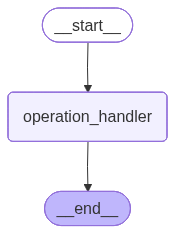

In [22]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [23]:
result = app.invoke({"values":[10,20,30,40],"name":"Shyam","operation":"+"})

In [24]:
result

{'name': 'Shyam',
 'values': [10, 20, 30, 40],
 'operation': '+',
 'result': 'Hi Shyam, Your answer is 100'}

In [25]:
result = app.invoke({"values":[10,20,30,40],"name":"Shyam","operation":"*"})

In [26]:
result

{'name': 'Shyam',
 'values': [10, 20, 30, 40],
 'operation': '*',
 'result': 'Hi Shyam, Your answer is 240000'}

## Sequential Graph

### Simple Greeter

In [27]:
from typing import TypedDict
from langgraph.graph import StateGraph

In [29]:
class AgentState(TypedDict):
  name: str
  age: str
  final: str

In [30]:
def first_node(state:AgentState)->AgentState:
  """
    This is the first node of the sequence
  """
  state['final'] = f"Hi, {state['name']}"
  return state

def second_node(state:AgentState)->AgentState:
  """
    This is the second node of the sequence
  """
  state['final'] = f"{state['final']} I see you are {state['age']} years old"
  return state


In [33]:
graph = StateGraph(AgentState)
graph.add_node(
    "first_node",
    first_node
)
graph.add_node(
    "second_node",
    second_node
)
graph.set_entry_point("first_node")

graph.add_edge(
    "first_node",
    "second_node"
)
graph.set_finish_point("second_node")
app = graph.compile()

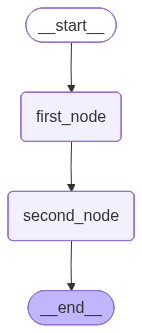

In [34]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [35]:
result = app.invoke({"name":"Charlie","age":20})

In [36]:
result

{'name': 'Charlie',
 'age': 20,
 'final': 'Hi, Charlie I see you are 20 years old'}

### Skill Listing

In [37]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

In [38]:
class AgentState(TypedDict):
  name: str
  age: str
  skills: List[str]
  final: str


In [40]:
def first_node(state: AgentState)-> AgentState:
  """
    Simple first node
  """
  state["final"] = f"{state["name"]}, welcome to the system!"
  return state

In [41]:
def second_node(state: AgentState)-> AgentState:
  """
    Simple second node
  """
  state["final"] = f"{state["final"]} You are {state["age"]} years old! "
  return state

In [42]:
def third_node(state: AgentState)-> AgentState:
  """
    Simple third node
  """
  state["final"] = f"{state["final"]} You have skills in: {",".join(state["skills"])}"
  return state

In [45]:
graph = StateGraph(AgentState)
graph.add_node(
    "first_node",
    first_node
)
graph.add_node(
    "second_node",
    second_node
)
graph.add_node(
    "third_node",
    third_node
)
graph.add_edge(
    "first_node",
    "second_node"
)
graph.add_edge(
    "second_node",
    "third_node"
)
graph.set_entry_point("first_node")
graph.set_finish_point("third_node")
app = graph.compile()

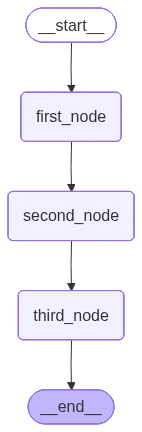

In [46]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [47]:
result = app.invoke({"name":"Linda","age":"31","skills":["Python","Machine Learning","LangGraph"]})

In [49]:
result

{'name': 'Linda',
 'age': '31',
 'skills': ['Python', 'Machine Learning', 'LangGraph'],
 'final': 'Linda, welcome to the system! You are 31 years old!  You have skills in: Python,Machine Learning,LangGraph'}